# Employee Retention ML

**Author:** Sebastian Ahumada  
**Date:** September 2023 

**Description:**

The objective of this notebook is to create the tables that feed the PowerBI Employee Retention Model, which can be found in the PowerBI section of this GitHub repository. The idea of the project is to segment employees from a test dataset based on certain characteristics, and then calculate for each group which variables are most important when deciding whether to leave the company.

# Import Libraries

In [1]:
import pandas as pd

# Read Data

In [62]:
ws = 'C:/Users/Sebastian.Ahumada/Desktop/EvS/HR POC/'
employee_survey_data = pd.read_csv(ws + "employee_survey_data.csv")
general_data = pd.read_csv(ws + "general_data.csv")
in_time = pd.read_csv(ws + "in_time.csv")
manager_survey_data = pd.read_csv(ws + "manager_survey_data.csv")
out_time = pd.read_csv(ws + "out_time.csv")

## Change col names
in_time = in_time.rename(columns={'Unnamed: 0':'EmployeeID'})
out_time = out_time.rename(columns={'Unnamed: 0':'EmployeeID'})

In [63]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


# Create Inputs

## Creating Avg Daily working time 

In [64]:
in_time_unpivot = pd.melt(in_time, id_vars=['EmployeeID'], var_name='day', value_name='in_time')
out_time_unpivot = pd.melt(out_time, id_vars=['EmployeeID'], var_name='day', value_name='out_time')
in_out_time = in_time_unpivot.merge(out_time_unpivot, on=['EmployeeID', 'day'], how='left')
in_out_time['in_time'] = pd.to_datetime(in_out_time['in_time'])
in_out_time['out_time'] = pd.to_datetime(in_out_time['out_time'])
in_out_time['AvgDailyWorkedTime'] = (in_out_time['out_time'] - in_out_time['in_time']).dt.total_seconds() / 3600
average_worked_time = pd.DataFrame(in_out_time.groupby('EmployeeID')['AvgDailyWorkedTime'].mean()).reset_index()
average_worked_time.head()

,EmployeeID,AvgDailyWorkedTime
0,1,7.373651
1,2,7.718969
2,3,7.013240
3,4,7.193678
4,5,8.006175


## Joining tables

In [65]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [66]:
df = general_data.merge(average_worked_time, on=['EmployeeID'], how='left')
df = df.merge(employee_survey_data, on=['EmployeeID'], how='left')
df = df.merge(manager_survey_data, on=['EmployeeID'], how='left')
df['MonthlyIncome'] = df['MonthlyIncome'] / 83.14
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AvgDailyWorkedTime,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,1577.579986,1.0,Y,11,8,0,1.0,6,1,0,0,7.373651,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,503.848930,0.0,Y,23,8,1,6.0,3,5,1,4,7.718969,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,2324.753428,1.0,Y,15,8,3,5.0,2,5,0,3,7.013240,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,1000.841953,3.0,Y,11,8,3,13.0,5,8,7,5,7.193678,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,281.693529,4.0,Y,12,8,2,9.0,2,6,0,4,8.006175,4.0,1.0,3.0,3,3


In [67]:
df_input = df
df_input['Attrition'] = df_input['Attrition'].replace({'Yes': 1, 'No': 0})
df_input = df_input.drop('Over18', axis=1)
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
df_input = pd.get_dummies(df_input, columns=categorical_columns)

df_input.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AvgDailyWorkedTime,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,1,1,1,1577.579986,1.0,11,8,0,1.0,6,1,0,0,7.373651,3.0,4.0,2.0,3,3,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1,31,1,10,1,1,2,1,503.848930,0.0,23,8,1,6.0,3,5,1,4,7.718969,3.0,2.0,4.0,2,4,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,32,0,17,4,1,3,4,2324.753428,1.0,15,8,3,5.0,2,5,0,3,7.013240,2.0,2.0,1.0,3,3,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,38,0,2,5,1,4,3,1000.841953,3.0,11,8,3,13.0,5,8,7,5,7.193678,4.0,4.0,3.0,2,3,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,32,0,10,1,1,5,1,281.693529,4.0,12,8,2,9.0,2,6,0,4,8.006175,4.0,1.0,3.0,3,3,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


# Modelling

In [82]:
df_input_clustering = df_input[['Age','MonthlyIncome']]

## Clustering

In [83]:
from pycaret.clustering import *
s = setup(df_input_clustering, normalize = True)

,Description,Value
0,Session id,7335
1,Original data shape,"(4410, 2)"
2,Transformed data shape,"(4410, 2)"
3,Numeric features,2
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [84]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [85]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3608,3868.6150,0.8814,0,0,0


In [86]:
pull()

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3608,3868.615,0.8814,0,0,0


In [87]:
plot_model(model, plot = 'cluster')

In [88]:
cluster_results = assign_model(model)
clusters = cluster_results['Cluster']
result = pd.concat([df_input,clusters], axis = 1)
result.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AvgDailyWorkedTime,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Cluster
0,51,0,6,2,1,1,1,1577.579986,1.0,11,8,0,1.0,6,1,0,0,7.373651,3.0,4.0,2.0,3,3,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,Cluster 2
1,31,1,10,1,1,2,1,503.848930,0.0,23,8,1,6.0,3,5,1,4,7.718969,3.0,2.0,4.0,2,4,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,Cluster 1
2,32,0,17,4,1,3,4,2324.753428,1.0,15,8,3,5.0,2,5,0,3,7.013240,2.0,2.0,1.0,3,3,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,Cluster 2
3,38,0,2,5,1,4,3,1000.841953,3.0,11,8,3,13.0,5,8,7,5,7.193678,4.0,4.0,3.0,2,3,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,Cluster 0
4,32,0,10,1,1,5,1,281.693529,4.0,12,8,2,9.0,2,6,0,4,8.006175,4.0,1.0,3.0,3,3,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,Cluster 1


### Analyze Clusters

In [89]:
pd.set_option('display.max_columns', None)
grouped_avg = cluster_results.groupby('Cluster').mean()
grouped_avg

,Age,MonthlyIncome
Cluster,,
Cluster 0,37.653465,544.260315
Cluster 1,27.780822,582.951050
Cluster 2,35.904959,1859.693481
Cluster 3,50.547368,594.928894


In [90]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
min_max_scaler = MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(grouped_avg)
df_minmax = pd.DataFrame(df_minmax, columns=grouped_avg.columns)
df_T = df_minmax.T
df_T['Row_Variance'] = df_T.apply(np.var, axis=1)
df_T = df_T.sort_values(by='Row_Variance', ascending=False)
df_T

,0,1,2,3,Row_Variance
MonthlyIncome,0.000000,0.029413,1.000000,0.038519,0.179307
Age,0.433647,0.000000,0.356845,1.000000,0.128481


## Classify

In [91]:
from pycaret.classification import *
clf1 = setup(data = result, target = 'Attrition', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Attrition
2,Target type,Binary
3,Original data shape,"(4410, 50)"
4,Transformed data shape,"(4410, 53)"
5,Transformed train set shape,"(3087, 53)"
6,Transformed test set shape,"(1323, 53)"
7,Numeric features,48
8,Categorical features,1
9,Rows with missing values,2.5%


In [92]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9802,0.9953,0.8817,0.9956,0.9343,0.9228,0.9257,0.6970
xgboost,Extreme Gradient Boosting,0.9767,0.9825,0.8877,0.9655,0.9243,0.9105,0.9121,0.6630
rf,Random Forest Classifier,0.9754,0.9905,0.8535,0.9929,0.9173,0.9030,0.9069,0.8420
lightgbm,Light Gradient Boosting Machine,0.9734,0.9791,0.8656,0.9672,0.9127,0.8971,0.8996,0.6460
catboost,CatBoost Classifier,0.9657,0.9775,0.8053,0.9781,0.8827,0.8629,0.8689,2.6740
dt,Decision Tree Classifier,0.9543,0.9225,0.8756,0.8481,0.8603,0.8331,0.8341,0.5150
gbc,Gradient Boosting Classifier,0.8999,0.9067,0.4400,0.8836,0.5803,0.5319,0.5769,0.8260
ada,Ada Boost Classifier,0.8633,0.8393,0.3414,0.6507,0.4432,0.3747,0.4020,0.8330
lr,Logistic Regression,0.8588,0.8086,0.2611,0.6606,0.3724,0.3096,0.3529,1.3610
lda,Linear Discriminant Analysis,0.8584,0.8081,0.2791,0.6452,0.3879,0.3220,0.3590,0.4850


In [93]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9741,0.9962,0.8400,1.0000,0.9130,0.8980,0.9027
1,0.9741,0.9911,0.8400,1.0000,0.9130,0.8980,0.9027
2,0.9676,0.9974,0.8000,1.0000,0.8889,0.8702,0.8776
3,0.9741,0.9928,0.8600,0.9773,0.9149,0.8997,0.9023
4,0.9741,0.9913,0.8400,1.0000,0.9130,0.8980,0.9027
5,0.9871,0.9963,0.9200,1.0000,0.9583,0.9507,0.9518
6,0.9935,0.9972,0.9600,1.0000,0.9796,0.9757,0.9760
7,0.9935,0.9969,0.9592,1.0000,0.9792,0.9753,0.9756
8,0.9805,0.9980,0.8776,1.0000,0.9348,0.9234,0.9261


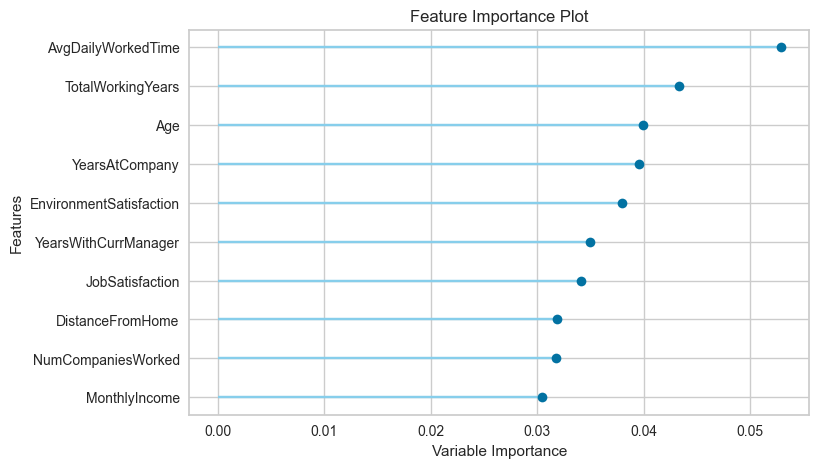

In [94]:
plot_model(et, plot = 'feature')

In [102]:
result_general = result.drop('Cluster', axis = 1)

X = result_general.drop('Attrition', axis = 1).fillna(0)
y = result_general['Attrition']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo ExtraTreeClassifier
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


### Feature Importance
feature_names = X.columns
feature_importance = model.feature_importances_

# Crear un DataFrame con los nombres de las características y sus importancias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df['Cluster'] = 'General'
feature_importance_df

Accuracy: 0.9965986394557823


,Feature,Importance,Cluster
16,AvgDailyWorkedTime,0.059608,General
11,TotalWorkingYears,0.047694,General
0,Age,0.044704,General
15,YearsWithCurrManager,0.041016,General
13,YearsAtCompany,0.040549,General
18,JobSatisfaction,0.038254,General
1,DistanceFromHome,0.034503,General
17,EnvironmentSatisfaction,0.033882,General
6,MonthlyIncome,0.032405,General
14,YearsSinceLastPromotion,0.032258,General


## Final Model

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [96]:
result_0 = result[result['Cluster'] == 'Cluster 0'].drop('Cluster', axis = 1)
result_1 = result[result['Cluster'] == 'Cluster 1'].drop('Cluster', axis = 1)
result_2 = result[result['Cluster'] == 'Cluster 2'].drop('Cluster', axis = 1)
result_3 = result[result['Cluster'] == 'Cluster 3'].drop('Cluster', axis = 1)

In [97]:
X = result_0.drop('Attrition', axis = 1).fillna(0)
y = result_0['Attrition']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo ExtraTreeClassifier
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


### Feature Importance
feature_names = X.columns
feature_importance = model.feature_importances_

# Crear un DataFrame con los nombres de las características y sus importancias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df['Cluster'] = 'Cluster 0'
feature_importance_df

Accuracy: 1.0


,Feature,Importance,Cluster
16,AvgDailyWorkedTime,0.076145,Cluster 0
7,NumCompaniesWorked,0.041617,Cluster 0
14,YearsSinceLastPromotion,0.039553,Cluster 0
19,WorkLifeBalance,0.038546,Cluster 0
18,JobSatisfaction,0.035828,Cluster 0
17,EnvironmentSatisfaction,0.034798,Cluster 0
8,PercentSalaryHike,0.034363,Cluster 0
1,DistanceFromHome,0.034112,Cluster 0
0,Age,0.033392,Cluster 0
11,TotalWorkingYears,0.031573,Cluster 0


In [98]:
X = result_1.drop('Attrition', axis = 1).fillna(0)
y = result_1['Attrition']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo ExtraTreeClassifier
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


### Feature Importance
feature_names = X.columns
feature_importance = model.feature_importances_

# Crear un DataFrame con los nombres de las características y sus importancias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df['Cluster'] = 'Cluster 1'
feature_importance_df

Accuracy: 1.0


,Feature,Importance,Cluster
13,YearsAtCompany,0.058302,Cluster 1
11,TotalWorkingYears,0.049796,Cluster 1
15,YearsWithCurrManager,0.049205,Cluster 1
16,AvgDailyWorkedTime,0.048882,Cluster 1
47,MaritalStatus_Single,0.042423,Cluster 1
0,Age,0.038340,Cluster 1
17,EnvironmentSatisfaction,0.034316,Cluster 1
18,JobSatisfaction,0.034048,Cluster 1
6,MonthlyIncome,0.030730,Cluster 1
7,NumCompaniesWorked,0.029800,Cluster 1


In [99]:
X = result_2.drop('Attrition', axis = 1).fillna(0)
y = result_2['Attrition']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo ExtraTreeClassifier
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


### Feature Importance
feature_names = X.columns
feature_importance = model.feature_importances_

# Crear un DataFrame con los nombres de las características y sus importancias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df['Cluster'] = 'Cluster 2'
feature_importance_df

Accuracy: 0.9794520547945206


,Feature,Importance,Cluster
16,AvgDailyWorkedTime,0.057130,Cluster 2
10,StockOptionLevel,0.040873,Cluster 2
0,Age,0.040579,Cluster 2
11,TotalWorkingYears,0.038970,Cluster 2
13,YearsAtCompany,0.038244,Cluster 2
19,WorkLifeBalance,0.036833,Cluster 2
15,YearsWithCurrManager,0.036098,Cluster 2
18,JobSatisfaction,0.035343,Cluster 2
1,DistanceFromHome,0.034451,Cluster 2
20,JobInvolvement,0.034147,Cluster 2


In [100]:
X = result_3.drop('Attrition', axis = 1).fillna(0)
y = result_3['Attrition']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo ExtraTreeClassifier
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


### Feature Importance
feature_names = X.columns
feature_importance = model.feature_importances_

# Crear un DataFrame con los nombres de las características y sus importancias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df['Cluster'] = 'Cluster 3'
feature_importance_df

Accuracy: 1.0


,Feature,Importance,Cluster
11,TotalWorkingYears,0.047007,Cluster 3
20,JobInvolvement,0.045287,Cluster 3
0,Age,0.038702,Cluster 3
16,AvgDailyWorkedTime,0.038257,Cluster 3
14,YearsSinceLastPromotion,0.037789,Cluster 3
7,NumCompaniesWorked,0.036020,Cluster 3
1,DistanceFromHome,0.035111,Cluster 3
13,YearsAtCompany,0.034122,Cluster 3
17,EnvironmentSatisfaction,0.034051,Cluster 3
2,Education,0.033761,Cluster 3


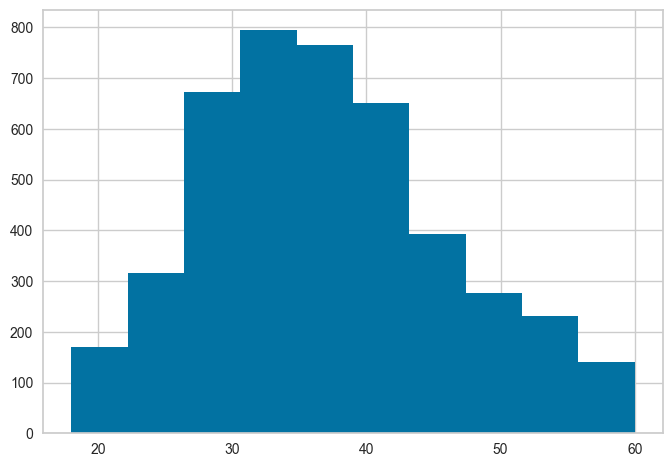

In [110]:
import matplotlib.pyplot as plt
plt.hist(result['Age'])
plt.show()

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

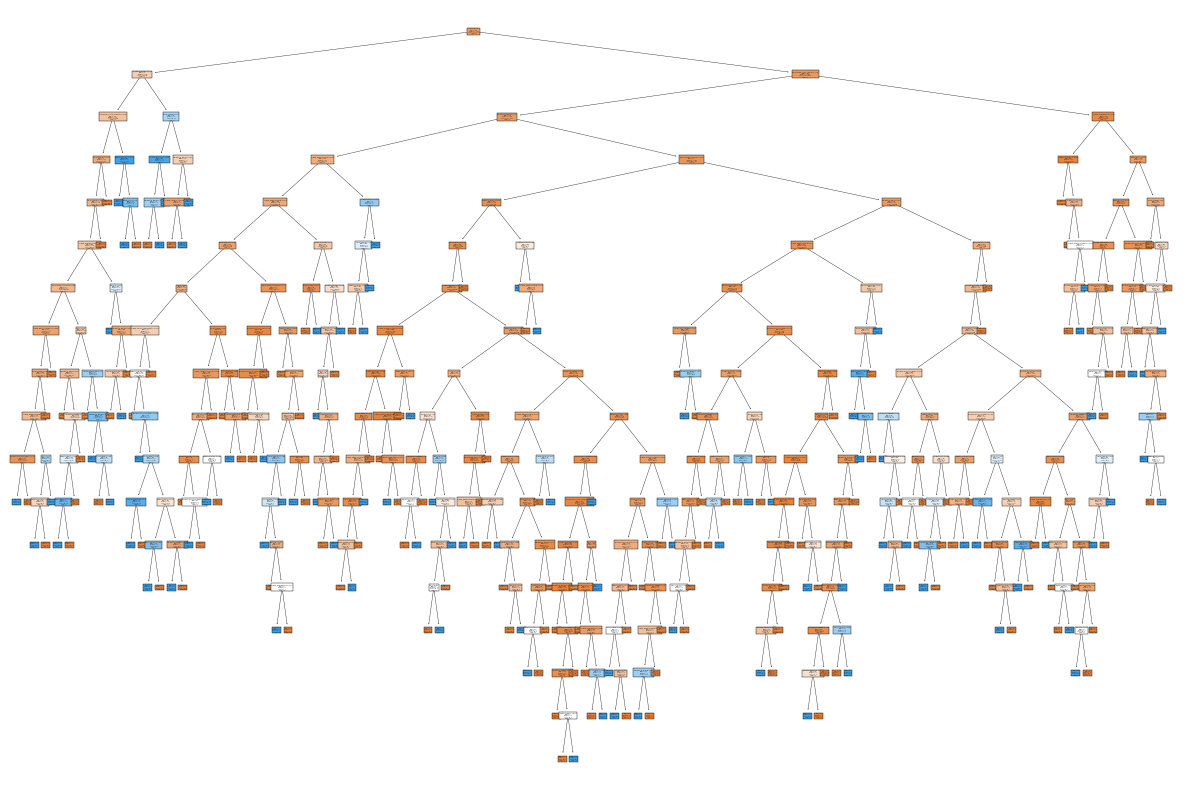

In [25]:
plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names='Attrition')
plt.show()